In [110]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

In [111]:
import locale
locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252') 

'Spanish_Spain.1252'

# ETL - EDA

In [112]:
victimas = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')
victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [113]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


## Manejo de duplicados

Se realizó la revisión de duplicados del dataset y se encontró que no existian valores repetidos para todas las columnas

In [114]:
victimas[victimas.duplicated()]

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


## Manejos de nulos

Se hizo la revision y se descubrio que no existen valores vacios para este dataset. Sin embargo, conociendo que se tienen el valor *SD* (Sin Dato) se decidió revisar los registros con este valor. Se encontraron 59 registros con este valor y 2 con este valor en todas sus columnas (con excepcion de los datos de fecha del hecho y el id del hecho) por lo cual se decicio borrar esos 2.

In [115]:
victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [116]:
victimas[(victimas['ROL']=='SD')|(victimas['VICTIMA']=='SD')|(victimas['SEXO']=='SD')|(victimas['EDAD']=='SD')].shape[0]

59

In [117]:
victimas[(victimas['ROL']=='SD')&(victimas['VICTIMA']=='SD')&(victimas['SEXO']=='SD')&(victimas['EDAD']=='SD')]

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
141,2016-0174,2016-12-27,2016,12,27,SD,SD,SD,SD,SD


In [44]:
victimas.drop(victimas[(victimas['ROL']=='SD')&(victimas['VICTIMA']=='SD')&(victimas['SEXO']=='SD')&(victimas['EDAD']=='SD')].index, inplace=True)

## Transformacion de columnas

In [119]:
victimas['DIA_SEMANA_NOM'] = victimas['FECHA'].dt.strftime('%A').str.upper()
victimas['DIA_SEMANA'] = victimas['FECHA'].dt.weekday

In [122]:
victimas.rename(columns={'AAAA':'AÑO','MM':'MES'},inplace=True)
victimas.drop(columns=['DD','FECHA','FECHA_FALLECIMIENTO'],inplace=True)

## Reordenamiento de columnas

Se decidió reordenar las columnas de manera que las columnas con informacion nueva estuvieran cerca de las columnas relacionadas (ej. *'DIA_SEMANA'* con *'AÑO'* y *'MES'*). Adicionalmente, se renombro la columna **'ID_hecho'** a *'ID'* para nromalizarlo ya que es la conexion con la tabla __*'hechos'*__

In [141]:
victimas.rename(columns={'ID_hecho':'ID'}, inplace=True)

In [142]:
victimas = victimas[['ID', 'AÑO', 'MES', 'DIA_SEMANA', 'DIA_SEMANA_NOM', 'ROL', 'VICTIMA', 'SEXO', 'EDAD']]

In [143]:
victimas.head()

,ID,AÑO,MES,DIA_SEMANA,DIA_SEMANA_NOM,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016,1,4,VIERNES,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016,1,5,SÁBADO,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016,1,6,DOMINGO,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,2016,1,6,DOMINGO,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,2016,1,3,JUEVES,CONDUCTOR,MOTO,MASCULINO,29


## Tipo de dato

Al finalizar la limpieza y normalización del DataFrame se tienen 4 tipos de datos para este dataset: 
- **Object (string):** *'ID'*, *'DIA_SEMANA_NOM'*, *'ROL'*, *'VICTIMA'*, *'SEXO'*
- **Int:** *'AÑO'*, *'MES'*, *'DIA_SEMANA'*, *'EDAD'*

In [144]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              717 non-null    object
 1   AÑO             717 non-null    int64 
 2   MES             717 non-null    int64 
 3   DIA_SEMANA      717 non-null    int32 
 4   DIA_SEMANA_NOM  717 non-null    object
 5   ROL             717 non-null    object
 6   VICTIMA         717 non-null    object
 7   SEXO            717 non-null    object
 8   EDAD            717 non-null    int64 
dtypes: int32(1), int64(3), object(5)
memory usage: 47.7+ KB


## Analisis de Variables

Debido a que el notebook del ETL y EDA del DataFrame de [Hechos](ETL_EDA_hechos.ipynb) se realizó el analisis relacionado con la **fecha** este analisis se enfocara en las columnas **'ROL´**, **'SEXO'** y **'EDAD'**

### Rol

In [45]:
victimas['ROL'].unique()

array(['CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', 'SD', 'CICLISTA'],
      dtype=object)

In [46]:
victimas['ROL'].value_counts()

ROL
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                        9
Name: count, dtype: int64

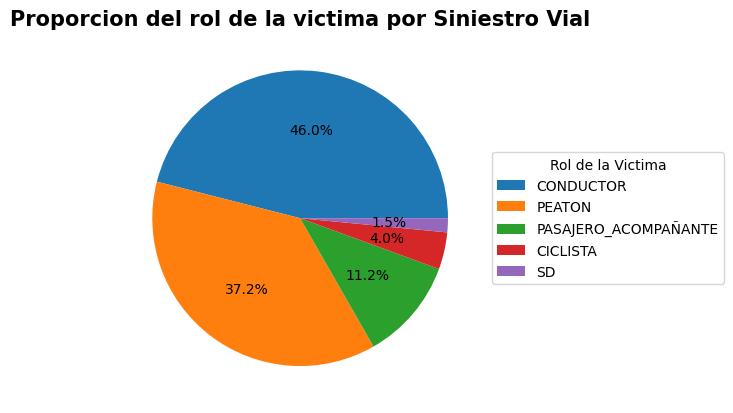

In [17]:
plt.pie(victimas['ROL'].value_counts(),autopct='%1.1f%%')
plt.title('Proporcion del rol de la victima por Siniestro Vial',fontsize=15,fontweight='bold',loc='center')
plt.legend(['CONDUCTOR','PEATON','PASAJERO_ACOMPAÑANTE','CICLISTA','SD'],title='Rol de la Victima',loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Victima

In [47]:
victimas['VICTIMA'].value_counts()

VICTIMA
MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
CARGAS         7
SD             7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64

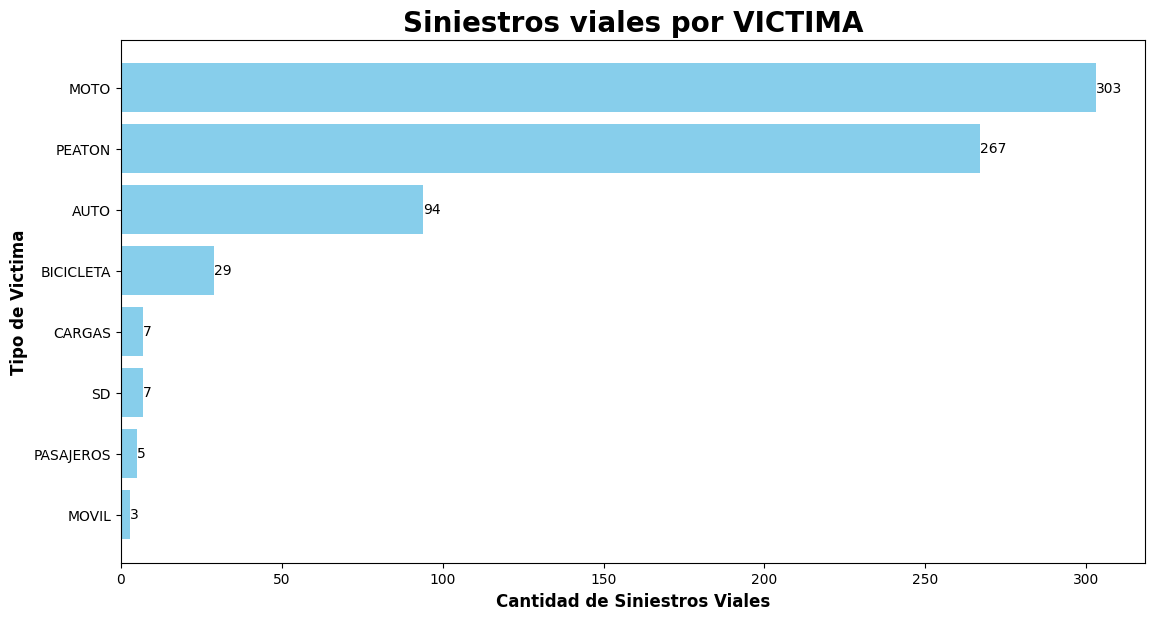

In [48]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(victimas['VICTIMA'].value_counts().index,victimas['VICTIMA'].value_counts().values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Siniestros viales por VICTIMA', fontweight = 'bold',fontsize=20)
plt.yticks(ticks=victimas['VICTIMA'].value_counts().index)
plt.ylabel('Tipo de Victima',fontweight = 'bold',fontsize=12)
plt.xlabel('Cantidad de Siniestros Viales',fontweight = 'bold',fontsize=12)

VICTIMA_counts = victimas['VICTIMA'].value_counts().sort_values(ascending=False)
for index, value in enumerate(VICTIMA_counts.values):
    plt.text(value, index, str(value), va='center')
plt.show()

### Sexo

In [49]:
victimas['SEXO'].value_counts()

SEXO
MASCULINO    545
FEMENINO     166
SD             4
Name: count, dtype: int64

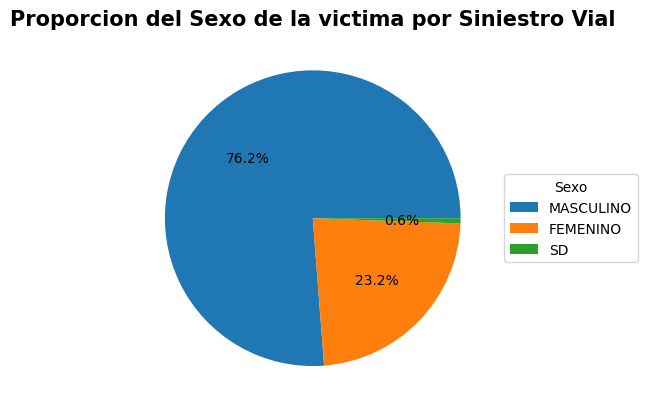

In [50]:
plt.pie(victimas['SEXO'].value_counts(),autopct='%1.1f%%')
plt.title('Proporcion del Sexo de la victima por Siniestro Vial',fontsize=15,fontweight='bold',loc='center')
plt.legend(['MASCULINO','FEMENINO','SD'],title='Sexo',loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Edad

Se encontro que existian 51 registros con valor *'SD'* (Sin Dato). Con el fin de realizar un mejor analisis se decidió imputar estos valores. Teniendo en cuenta que tenemos valores enteros repetitivos con una distribucion un poco segada a la derecha, se considero que la mejor opcion era llenar estos valores con la moda (30 años)

In [131]:
victimas['EDAD'].describe()

count     717
unique     86
top        SD
freq       53
Name: EDAD, dtype: object

In [132]:
victimas[~(victimas['EDAD']=='SD')]['EDAD'].value_counts()

EDAD
30    28
29    24
23    24
27    20
28    20
      ..
11     1
92     1
12     1
5      1
88     1
Name: count, Length: 85, dtype: int64

In [133]:
victimas[~(victimas['EDAD']=='SD')]['EDAD'].mode().iloc[0]

30

Text(0.5, 0, 'Edad')

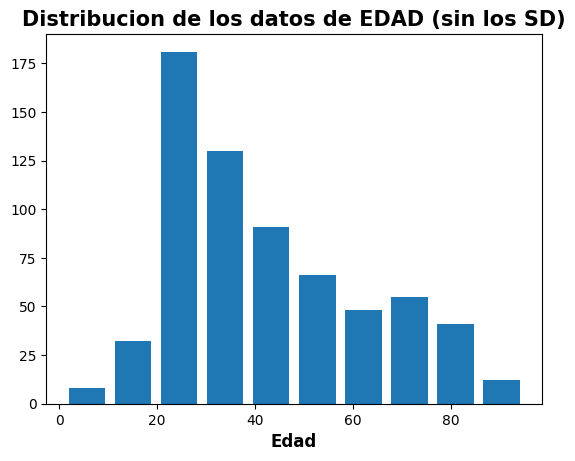

In [134]:
plt.hist(victimas[~(victimas['EDAD']=='SD')]['EDAD'], rwidth=0.8)
plt.title('Distribucion de los datos de EDAD (sin los SD)',fontweight='bold', fontsize=15)
plt.xlabel('Edad',fontweight = 'bold',fontsize=12)

In [135]:
victimas['EDAD'] = victimas['EDAD'].apply(lambda x : victimas[~(victimas['EDAD']=='SD')]['EDAD'].mode().iloc[0] if x == 'SD' else x)

In [136]:
victimas['EDAD'] = victimas['EDAD'].astype(int)

Se graficaron los datos de **'EDAD'** para entender como en que rango se encuentran y como se distribuyen. Se encontro que los datos se distribuyen entre 1 y 95 años y aunque la media es 41 años y la moda 30 años, los datos no se encuentran concentrados significativamente hacia un valor de manera que no se considero la existencia de outliers y esto se verifico haciendo uso de un BoxPlot

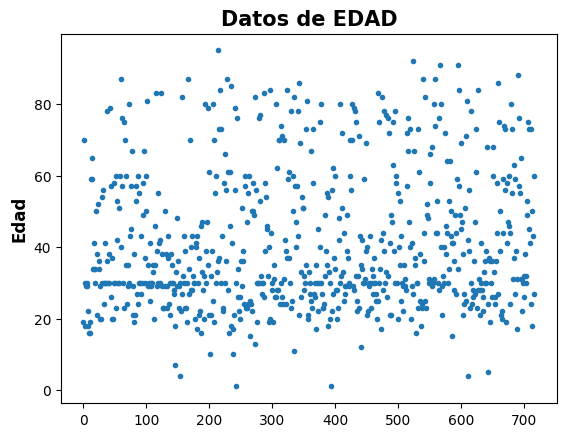

In [137]:
plt.plot(victimas['EDAD'],'o',markersize=3)
plt.title('Datos de EDAD',fontweight='bold', fontsize=15)
plt.ylabel('Edad',fontweight = 'bold',fontsize=12)
plt.show()

In [79]:
victimas['EDAD'].describe()

count    715.000000
mean      41.299301
std       19.324008
min        1.000000
25%       28.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: EDAD, dtype: float64

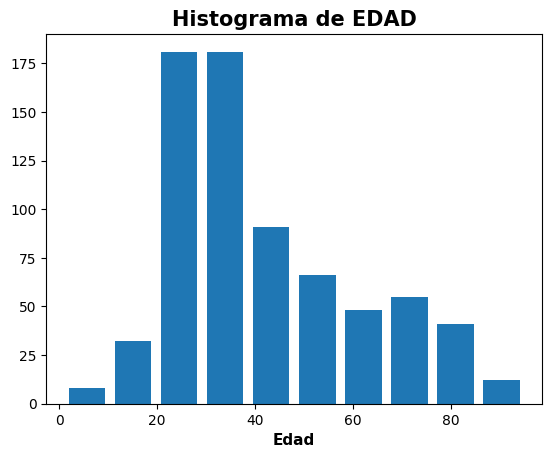

In [98]:
plt.hist(victimas['EDAD'], rwidth=0.8)
plt.title('Histograma de EDAD',fontweight='bold', fontsize=15)
plt.xlabel('Edad',fontweight = 'bold',fontsize=11)
plt.show()

In [97]:
#Calculo de bigotes
Q3 = float(victimas['EDAD'].quantile(0.75))
Q1 = float(victimas['EDAD'].quantile(0.25))
RIC = Q3 - Q1

Min_ser_bp = Q1 - 1.5*RIC
if Min_ser_bp < min(victimas['EDAD']):
    Min_ser_bp = min(victimas['EDAD'])
Max_ser_bp = Q3 + 1.5*RIC
if Max_ser_bp > max(victimas['EDAD']):
    Max_ser_bp = max(victimas['EDAD'])

Min_ser_bp, Max_ser_bp

(1.0, 95.0)

Text(0.5, 1.0, 'BoxPlot de EDAD')

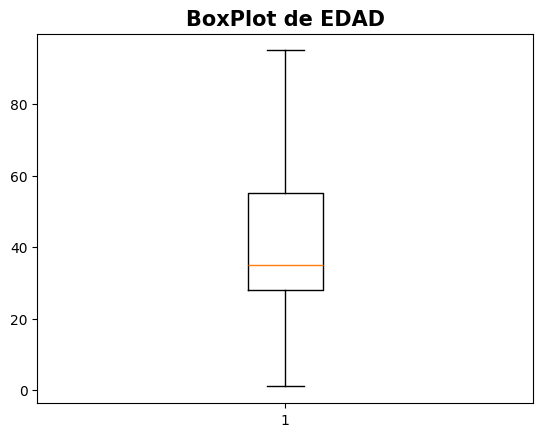

In [100]:
plt.boxplot(victimas['EDAD'])
plt.title('BoxPlot de EDAD',fontweight='bold', fontsize=15)

## Analisis de Correlacion

In [146]:
victimas_corr = victimas[['AÑO', 'MES', 'DIA_SEMANA','EDAD']]

In [147]:
corre = victimas_corr.corr()
corre

,AÑO,MES,DIA_SEMANA,EDAD
AÑO,1.000000,-0.039499,-0.014550,0.094783
MES,-0.039499,1.000000,-0.054913,0.025470
DIA_SEMANA,-0.014550,-0.054913,1.000000,-0.086980
EDAD,0.094783,0.025470,-0.086980,1.000000


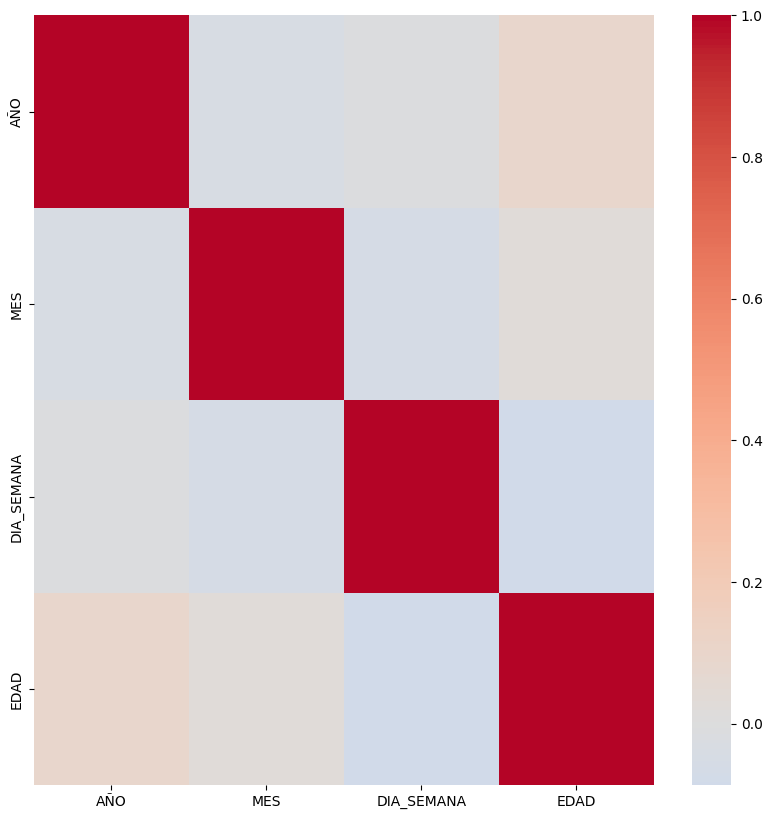

In [148]:
plt.figure(figsize=(10,10))
sns.heatmap(corre,cmap='coolwarm',center=0)
plt.show()

In [151]:
dummies = pd.get_dummies(victimas[['ROL', 'VICTIMA', 'SEXO']])
victimas_corr = pd.concat([victimas_corr, dummies], axis=1)
victimas_corr

,AÑO,MES,DIA_SEMANA,EDAD,ROL_CICLISTA,ROL_CONDUCTOR,ROL_PASAJERO_ACOMPAÑANTE,ROL_PEATON,ROL_SD,VICTIMA_AUTO,VICTIMA_BICICLETA,VICTIMA_CARGAS,VICTIMA_MOTO,VICTIMA_MOVIL,VICTIMA_PASAJEROS,VICTIMA_PEATON,VICTIMA_SD,SEXO_FEMENINO,SEXO_MASCULINO,SEXO_SD
0,2016,1,4,19,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,2016,1,5,70,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,2016,1,6,30,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,2016,1,6,18,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,2016,1,3,29,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021,12,6,50,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
713,2021,12,0,18,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False
714,2021,12,0,43,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False
715,2021,12,3,27,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False


In [152]:
corre_exp = victimas_corr.corr()
corre_exp

,AÑO,MES,DIA_SEMANA,EDAD,ROL_CICLISTA,ROL_CONDUCTOR,ROL_PASAJERO_ACOMPAÑANTE,ROL_PEATON,ROL_SD,VICTIMA_AUTO,VICTIMA_BICICLETA,VICTIMA_CARGAS,VICTIMA_MOTO,VICTIMA_MOVIL,VICTIMA_PASAJEROS,VICTIMA_PEATON,VICTIMA_SD,SEXO_FEMENINO,SEXO_MASCULINO,SEXO_SD
AÑO,1.000000,-0.039499,-0.014550,0.094783,0.076002,0.014177,-0.050214,0.018040,-0.121641,-0.023209,0.076002,-0.078247,0.012121,-0.032614,0.011314,0.018040,-0.116686,0.011988,0.013651,-0.119499
MES,-0.039499,1.000000,-0.054913,0.025470,0.071376,-0.045713,0.042010,-0.014501,0.020395,0.015309,0.071376,0.048348,-0.045649,-0.018548,0.035443,-0.014501,0.034361,0.054262,-0.065362,0.055137
DIA_SEMANA,-0.014550,-0.054913,1.000000,-0.086980,-0.022056,0.047312,0.080985,-0.095200,0.010495,0.146484,-0.022056,-0.000546,-0.007485,0.010289,-0.008718,-0.095200,0.042584,0.024676,-0.027486,0.014581
EDAD,0.094783,0.025470,-0.086980,1.000000,-0.020463,-0.326253,-0.144522,0.438812,0.000032,-0.026810,-0.020463,-0.002849,-0.418134,-0.016579,0.089184,0.438812,0.012720,0.230951,-0.216687,-0.053652
ROL_CICLISTA,0.076002,0.071376,-0.022056,-0.020463,1.000000,-0.189586,-0.072758,-0.158145,-0.025627,-0.079749,1.000000,-0.020386,-0.175641,-0.013308,-0.017205,-0.158145,-0.023148,0.021583,-0.017296,-0.018860
ROL_CONDUCTOR,0.014177,-0.045713,0.047312,-0.326253,-0.189586,1.000000,-0.327248,-0.711297,-0.115264,0.180213,-0.189586,-0.006311,0.688523,-0.016506,-0.077383,-0.711297,-0.104113,-0.374170,0.374594,-0.023392
ROL_PASAJERO_ACOMPAÑANTE,-0.050214,0.042010,0.080985,-0.144522,-0.072758,-0.327248,1.000000,-0.272976,-0.044235,0.242967,-0.072758,0.145025,0.046565,0.114283,0.236467,-0.272976,-0.000166,0.162555,-0.153626,-0.032555
ROL_PEATON,0.018040,-0.014501,-0.095200,0.438812,-0.158145,-0.711297,-0.272976,1.000000,-0.096149,-0.299205,-0.158145,-0.076484,-0.658977,-0.049930,-0.064550,1.000000,-0.086847,0.281681,-0.269904,-0.039090
ROL_SD,-0.121641,0.020395,0.010495,0.000032,-0.025627,-0.115264,-0.044235,-0.096149,1.000000,-0.048486,-0.025627,-0.012394,-0.037870,-0.008091,-0.010460,-0.096149,0.801330,-0.041611,-0.036173,0.362240
VICTIMA_AUTO,-0.023209,0.015309,0.146484,-0.026810,-0.079749,0.180213,0.242967,-0.299205,-0.048486,1.000000,-0.079749,-0.038569,-0.332308,-0.025179,-0.032551,-0.299205,-0.043795,-0.066254,0.073058,-0.035683


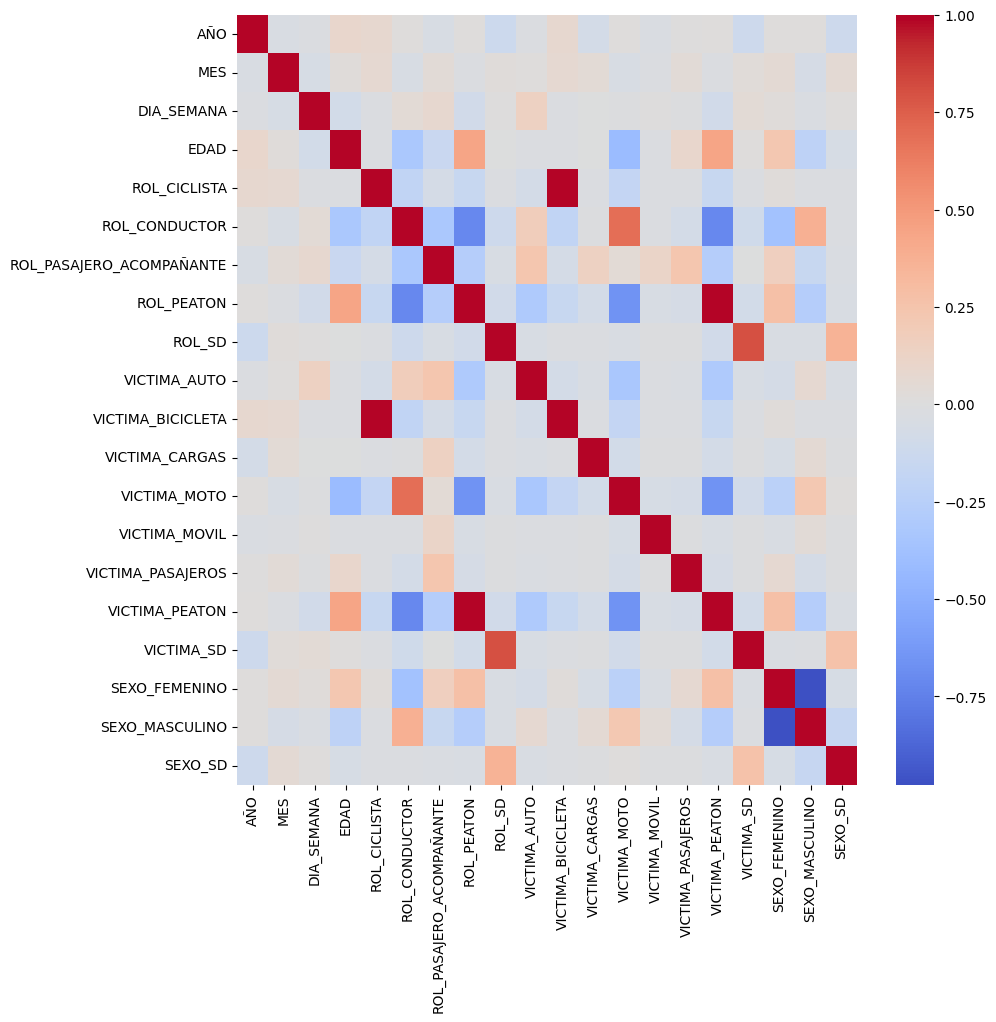

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(corre_exp,cmap='coolwarm',center=0)
plt.show()

## Exportar archivos

In [154]:
victimas

,ID,AÑO,MES,DIA_SEMANA,DIA_SEMANA_NOM,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016,1,4,VIERNES,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016,1,5,SÁBADO,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016,1,6,DOMINGO,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,2016,1,6,DOMINGO,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,2016,1,3,JUEVES,CONDUCTOR,MOTO,MASCULINO,29
...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021,12,6,DOMINGO,PEATON,PEATON,FEMENINO,50
713,2021-0093,2021,12,0,LUNES,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18
714,2021-0094,2021,12,0,LUNES,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43
715,2021-0095,2021,12,3,JUEVES,CONDUCTOR,MOTO,MASCULINO,27


In [155]:
victimas.to_csv('victimas.csv', index=False)